# INFO-F440 Big Data Algorithms
# Lecture 1: Feb 4, 2024


**Note there is homework at the end**

I have tried to pick the sizes of the examples to be large enough to show you what is going on, but small enough they they don't take too long to run. This whole notebook runs in a minute on my computer, and I hope it takes a similar amount of time on yours.

If you have any questions (or corrections!), please post on Teams.

# Timing functions

In class, I used some timing functions that I wrote that plot the runtimes of one or several univariate functions. These are meant to be easy to use.

First, here is some code to help us plot the runtimes of functions. The first is for a single function, and the second is for multiple ones. I use the [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) library.


In [2]:
import timeit
import matplotlib.pyplot as plt
import random


def plotruntime(f,r,trials=1,figsize=[3,3]):
    Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    
def plotruntimes(functions,labels,r,trials=1,figsize=[3,3]):
    fig, ax = plt.subplots(figsize=figsize)
    for f,l in zip(functions,labels):
        Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
        ax.plot(r,Times,label=l)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    ax.set_title("Runtime plot: "+str(trials)+" trial"+("s" if trials>1 else ""))
    ax.legend()





## Using the timing functions

Here are some demos of using these functions.

For the single functions I called:

`plotruntime(f,range(1000,100000,10000),10)`

Here `f` is the function of one variable, the range indicates which values `f` will be run with, and 10 is the number of trials. More trials usually gives a smoother graph, but of course takes longer. Same with range, 
if I left out the step and had `range(1000,100000)` this would do 99000 different values of `n` instead of 100.


For the mupliple functions I have:

`plotruntimes([f,g],["f","g"],range(1000,10000,1000),10)`

You can see the only difference is now there is a list of functions, and a second list with the labels so you know which is which.

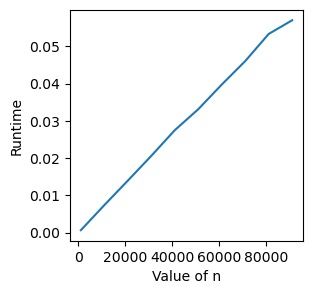

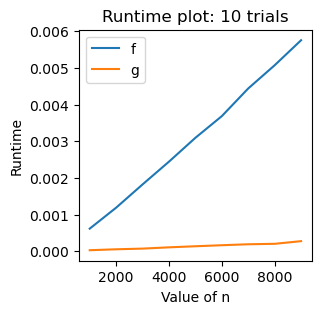

In [2]:
def f(n):
   A = [random.randint(0,1000) for x in range(n)] 

def g(n):
   A = [x for x in range(n)] 


    
plotruntime(f,range(1000,100000,10000),10)

plotruntimes([f,g],["f","g"],range(1000,10000,1000),10)




## Using lambda

Our plotting functions require that they be given function of one variable. But what if we have a function of more than one variable and we want to turn it into a function of one variable? We could do this by defining a new function, but Python allows an easier way by using what are known as lambda expressions, which are just inline nameless functions. It sounds complicated, but look at this code and you will see it is easy.

See the [docs](https://docs.python.org/3/tutorial/controlflow.html?highlight=lambda) for a full and short explanation.

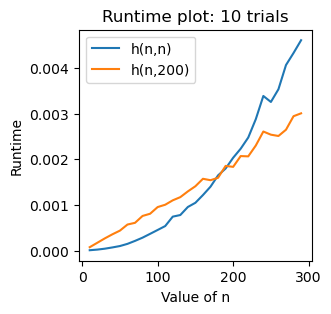

In [3]:
def h(n,m):
    return [(a,b) for a in range(n) for b in range(m)]


plotruntimes([lambda n:h(n,n),lambda n:h(n,200)],["h(n,n)","h(n,200)"],range(10,300,10),10)




# Intro: There are good and bad algorithms

The [Fibonacci numbers](https://mathworld.wolfram.com/FibonacciNumber.html) are usually defined as follows:

$Fib(N)=\begin{cases}0 & N=0 \\  1 & N=1  \\ Fib(N-1)+Fib(N-2) & \text{otherwise} \end{cases}$

This can be turned into code directly:

In [4]:
def Fib(N):
    if N==0:
        return 0
    if N==1:
        return 1
    return Fib(N-1)+Fib(N-2)

for N in range(40):
    print("Fib(",N,") is ",Fib(N))


Fib( 0 ) is  0
Fib( 1 ) is  1
Fib( 2 ) is  1
Fib( 3 ) is  2
Fib( 4 ) is  3
Fib( 5 ) is  5
Fib( 6 ) is  8
Fib( 7 ) is  13
Fib( 8 ) is  21
Fib( 9 ) is  34
Fib( 10 ) is  55
Fib( 11 ) is  89
Fib( 12 ) is  144
Fib( 13 ) is  233
Fib( 14 ) is  377
Fib( 15 ) is  610
Fib( 16 ) is  987
Fib( 17 ) is  1597
Fib( 18 ) is  2584
Fib( 19 ) is  4181
Fib( 20 ) is  6765
Fib( 21 ) is  10946
Fib( 22 ) is  17711
Fib( 23 ) is  28657
Fib( 24 ) is  46368
Fib( 25 ) is  75025
Fib( 26 ) is  121393
Fib( 27 ) is  196418
Fib( 28 ) is  317811
Fib( 29 ) is  514229
Fib( 30 ) is  832040
Fib( 31 ) is  1346269
Fib( 32 ) is  2178309
Fib( 33 ) is  3524578
Fib( 34 ) is  5702887
Fib( 35 ) is  9227465
Fib( 36 ) is  14930352
Fib( 37 ) is  24157817
Fib( 38 ) is  39088169
Fib( 39 ) is  63245986


Notice that this starts to get very slow once you try to compute beyond the 30th number or so. Experiment and see. The reason for this is simple, as discussed in class, since `Fib` makes two recursive calls, one to one number smaller and one to two numbers smaller, the total number of calls is somewhere in the range from $2^n$ to $2^{n/2}$. This is what is known as an *exponential time* algorithm. Such algorithms are to be avoided as they only terminate in reasonable time on very small inputs.

## Fibonacci: Take 2

Now if I asked you to compute the 100th Fibonacci number using a pen and paper I bet you could do it. You would write a list, start with 0 and 1, and keep adding numbers until you got to the desired number. In fact, this method works well on computers as well as in real life. Here is the code:

In [5]:
def Fib2(N):
    A=[0,1]
    for i in range(N-1):
        A.append(A[-1]+A[-2])
    return A[N]
    
for N in range(100):
    print("Fib2(",N,") is ",Fib2(N))
    

Fib2( 0 ) is  0
Fib2( 1 ) is  1
Fib2( 2 ) is  1
Fib2( 3 ) is  2
Fib2( 4 ) is  3
Fib2( 5 ) is  5
Fib2( 6 ) is  8
Fib2( 7 ) is  13
Fib2( 8 ) is  21
Fib2( 9 ) is  34
Fib2( 10 ) is  55
Fib2( 11 ) is  89
Fib2( 12 ) is  144
Fib2( 13 ) is  233
Fib2( 14 ) is  377
Fib2( 15 ) is  610
Fib2( 16 ) is  987
Fib2( 17 ) is  1597
Fib2( 18 ) is  2584
Fib2( 19 ) is  4181
Fib2( 20 ) is  6765
Fib2( 21 ) is  10946
Fib2( 22 ) is  17711
Fib2( 23 ) is  28657
Fib2( 24 ) is  46368
Fib2( 25 ) is  75025
Fib2( 26 ) is  121393
Fib2( 27 ) is  196418
Fib2( 28 ) is  317811
Fib2( 29 ) is  514229
Fib2( 30 ) is  832040
Fib2( 31 ) is  1346269
Fib2( 32 ) is  2178309
Fib2( 33 ) is  3524578
Fib2( 34 ) is  5702887
Fib2( 35 ) is  9227465
Fib2( 36 ) is  14930352
Fib2( 37 ) is  24157817
Fib2( 38 ) is  39088169
Fib2( 39 ) is  63245986
Fib2( 40 ) is  102334155
Fib2( 41 ) is  165580141
Fib2( 42 ) is  267914296
Fib2( 43 ) is  433494437
Fib2( 44 ) is  701408733
Fib2( 45 ) is  1134903170
Fib2( 46 ) is  1836311903
Fib2( 47 ) is  29712150

Notice how we printed out to the 40th number instantly. Let's see how far we can take this! Note that python has an internal limit of the number of digits it will print, which you can change. On my Python installation I need to change it as Fib2(100000) it otherwise too long.

In [17]:
import sys
sys.set_int_max_str_digits(100000)
Fib2(100000)

2597406934722172416615503402127591541488048538651769658472477070395253454351127368626555677283671674475463758722307443211163839947387509103096569738218830449305228763853133492135302679278956701051276578271635608073050532200243233114383986516137827238124777453778337299916214634050054669860390862750996639366409211890125271960172105060300350586894028558103675117658251368377438684936413457338834365158775425371912410500332195991330062204363035213756525421823998690848556374080179251761629391754963458558616300762819916081109836526352995440694284206571046044903805647136346033000520852277707554446794723709030979019014860432846819857961015951001850608264919234587313399150133919932363102301864172536477136266475080133982431231703431452964181790051187957316766834979901682011849907756686456845066287392485603914047605199550066288826345877189410680370091879365001733011710028310473947456256091444932821374855573864080579813028266640270354294412104919995803131876805899186513425175959911520563155337703996

The runtime of `Fib2(100000)` is still under a second. How fast would `Fib(100000)` be?

Approximately $10^{20000}$ years! For comparison, the universe is roughly $10^{10}$ years old.

Now, let's wrap things up using the plotting functions. Lets plot both functions up to 33 and just `Fib2` up to 100000. What do we expect? Well, `fib` should be an exponential curve. What about `fib2`? Well, if you look at the code, there is just one `for` loop, so you might expect it to be linear.

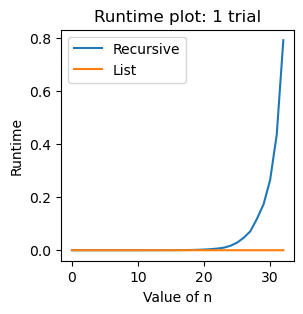

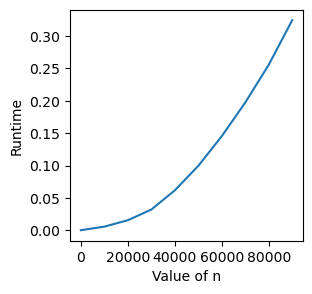

In [18]:
plotruntimes([Fib,Fib2],["Recursive","List"],range(33),1)
plotruntime(Fib2,range(1,100000,10000),1)

Looking at the results, `Fib` is looks like an exponential curve as expected, while `Fib2` does not look like a line, it seems to be growing a little faster.

Why is this? Well, look at the line of code:

`A.append(A[-1]+A[-2])`

What does this do? It adds two numbers. For example to compute the 5th number it will add 2 and 3. To compute the 100th it will add the 99th and the 98th, which are 218922995834555169026 and 135301852344706746049. If you were doing this on paper, wouldn't you take longer for the first addition than the second? Certainly. You can guess that the computer does as well. This shows how you need to be careful, that even simple looking things like + on integers will take varying amounts of time depending on how big the inputs are.

In fact, the running time is quadratic. How many digits are in a number? The integer $x$ has $\lfloor \log_{10} x\rfloor $ digits. So, the running time for `Fib2(N)` is something like 

$$ \sum_{i=1}^N \lfloor\log_{10} \tt{Fib2}(i) \rfloor $$

Each Fibonacci number is less than twice the number before, and at least twice two numbers before, so we can see that (except for the first few numbers)

$$ 2^{N/2} \leq  {\tt{Fib2}}(N) \leq 2^N$$

Taking logarithms:

$$ \log_{10} 2^{N/2} \leq \log_{10} {\tt{Fib2}}(N) \leq \log_{10} 2^N$$

And doing some math

$$ N \cdot \frac{\log_{10} 2}{2} \leq \log_{10} {\tt{Fib2}}(N) \leq N \log_{10} 2$$

So, $\log_{10} \tt{Fib2}(N)$ is linear in $N$, as $\frac{\log_{10} 2}{2}$ and $\log_{10} 2$ are just constants. Thus, using $\Theta$ to mean *ignoring constants and lower order terms* (more on this below), we get:

$$ \sum_{i=1}^N \lfloor\log_{10} {\tt{Fib2}}(i) \rfloor  = \Theta\left( \sum_{i=1}^N i\right) = \Theta \left( \frac{N(N+1)}{2} \right) = \Theta  \left( N^2 \right) $$

Note that if we changed the 'human digit' of 10 to the 'modern computer digit' of $2^{64}' in the above analysis it would only change the constants. It would not change the fact that the runtime is growth is quadradic. 

This is more of a issue in Python than in other languages. For example in C++, adding two numbers does not really depend on what the numbers are. What is C++'s magic? It is very simple, it does not allow large numbers.
It places a hard limit, typically $2^{32}$ or $2^{64}$ on the largest allowable integer, which is based on the ability physical circuits on a CPU to add numbers. What is $2^{64}$? 18446744073709551616. Thus C++ would not be able to compute large Fibonacci numbers using its normal way of storing integers without using a specialized library to handle large numbers.


# Motivation: Dropbox-like services

You all should be familiar with services like dropbox. You should also have heard of [Amazon S3](https://aws.amazon.com/s3/), which is part of Amazon Web services and is a leading provider of storage. Many you know use S3 (netflix, reddit, pintrist, etc) Until 2015, Dropbox used S3. 

S3 has a lot of data. It appears to be a secret exactly how much, but given that they offer a product called [Amazon Snowmobile](https://aws.amazon.com/snowmobile/) which is basically a giant truck-sized USB drive that holds 100PB=100,000TB=100,000,000GB that you can use to deposit data, that is a lot!

S3 is not free. You pay per transaction (very small) and to transfer data out. This costs $0.05 per GB.

Now, suppose you are dropbox. Dropbox charges €120 per year to store 2TB. At S3's pricing, this would cost €100 to transfer the data just once. This does not sound like a great business, especially since many users have their files on several computers.

One way Dropbox can be efficient is to detect if a file exists already so it does not have to transfer it. But if Dropbox's server has some files and a computer has some files, how do we determine if there are any duplicates that do not need to be transferred? And of course, we don't want to transfer them to determine this.

As this is day 1, lets simplify this very much. Suppose you have two collections of files, and you want to see if there are any in common. This removes the network aspect of this and lets us explore how to solve it in plain old python. We will also simplify and represent files by lists of characters. Before we even try to solve this, lets look at the runtime to determine if two lists are the same.

# Determining if two lists of characters are the same

Here we are going to look at the time to figure out whether or not two lists of characters are the same. In python this is simply the code `A==B` where `A` and `B` are lists. We will see that this will depend on how similar they are. First, some code to make a random list of characters, using the [random](https://docs.python.org/3/library/random.html) library: 

In [19]:
import string
import random

def randomListOfChars(length):
    letters = "qwertyuiopasdfghjklzxcvbnnm"
    return [random.choice(letters) for i in range(length)]

print(randomListOfChars(100))

['f', 'b', 'i', 'q', 'p', 'z', 'h', 'e', 'z', 'v', 'b', 'j', 'o', 'n', 'q', 'e', 'm', 'y', 'w', 'g', 'k', 'n', 'y', 'b', 'd', 'm', 'q', 'y', 'n', 'x', 'u', 'a', 'k', 'k', 'y', 'f', 'c', 'e', 'r', 'a', 'j', 'r', 'w', 'd', 'm', 'y', 's', 'x', 'z', 'h', 'm', 'n', 'w', 'v', 'z', 'h', 'y', 'g', 'a', 'h', 'x', 'k', 'g', 'c', 'w', 'a', 'o', 'g', 'o', 'a', 'x', 'k', 'u', 'b', 'y', 'q', 'i', 'x', 'o', 's', 'l', 'x', 'd', 'n', 'p', 'u', 'd', 'h', 'h', 'e', 'n', 'd', 'e', 'a', 'd', 'z', 'n', 'y', 'k', 'p']


Next, lets make some lists of lists of characters of increasing lengths. First we make two that are completely random, and then we make two that share the same first half.

In [20]:
# This takes some time, less than a mintue for me
dataA= [randomListOfChars(i) for i in range(10000)]
dataB= [randomListOfChars(i) for i in range(10000)]

prefix=randomListOfChars(10000)
dataC= [prefix[:i//2]+randomListOfChars(i//2) for i in range(10000)]
dataD= [prefix[:i//2]+randomListOfChars(i//2) for i in range(10000)]

In [21]:
dataD[5]

['b', 'r', 'g', 'k']

Observe that dataC and dataD share the same first half

In [22]:
for i in range(2,10,2):
    print("dataA["+str(i)+"]: "+str(dataA[i]))
    print("dataB["+str(i)+"]: "+str(dataB[i]))
    print("dataC["+str(i)+"]: "+str(dataC[i]))
    print("dataD["+str(i)+"]: "+str(dataD[i]))    

dataA[2]: ['h', 'a']
dataB[2]: ['g', 'm']
dataC[2]: ['b', 'o']
dataD[2]: ['b', 'p']
dataA[4]: ['j', 'u', 'q', 'h']
dataB[4]: ['i', 'f', 'w', 's']
dataC[4]: ['b', 'r', 'u', 'i']
dataD[4]: ['b', 'r', 'o', 'y']
dataA[6]: ['t', 'e', 'o', 's', 'l', 'i']
dataB[6]: ['d', 'r', 'q', 'q', 'f', 'i']
dataC[6]: ['b', 'r', 'n', 'o', 'u', 'c']
dataD[6]: ['b', 'r', 'n', 'u', 'n', 'j']
dataA[8]: ['h', 'r', 'x', 'r', 'v', 'h', 's', 'g']
dataB[8]: ['o', 'k', 't', 'q', 'o', 't', 'y', 'm']
dataC[8]: ['b', 'r', 'n', 'x', 'b', 'p', 'u', 'v']
dataD[8]: ['b', 'r', 'n', 'x', 'x', 'c', 'k', 'c']


Now, here is a simple function to test to see if the nth element of A and B are the same

In [23]:
def nthSame(A,B,n):
    return A[n]==B[n]


print(dataA[6],dataB[6]," same? ",nthSame(dataA,dataB,6))
print(dataC[6],dataC[6]," same? ",nthSame(dataC,dataC,6))

['t', 'e', 'o', 's', 'l', 'i'] ['d', 'r', 'q', 'q', 'f', 'i']  same?  False
['b', 'r', 'n', 'o', 'u', 'c'] ['b', 'r', 'n', 'o', 'u', 'c']  same?  True


Now, lets try plotting nthSame with different values of n and the different sets. We will do three experiments.

- `dataA[n] == dataB[n]`: These are both random, so they are almost certainly different, and so probably this will not take much time to determine as they will almost certainly differ in one of the first elements
- `dataA[n] == dataA[n]`: These are the same, so this should take a long time as you need to look at all the elements of the list to make sure they are the same.
- `dataC[n] == dataD[n]`: There are same in the first half, but different in the second. Thus the runtime should be halfway between the first two experiments.

So, lets run the experiment:

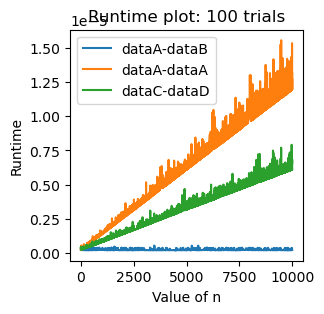

In [24]:
plotruntimes([lambda n :nthSame(dataA,dataB,n),
             lambda n :nthSame(dataA,dataA,n),
             lambda n :nthSame(dataC,dataD,n)],
             ["dataA-dataB","dataA-dataA","dataC-dataD"],range(10000),100)

The results are exactly as expected.

# Any records in common?

We need to set up the data that we will use to test our ideas to see if given two lists, there are any elements in common.

We are going to create two lists of size 100,000, recordsA and recordsB. Each of these lists contains a list of 100 chars, the first 50 are the same for all and the last 50 are random.

In [25]:
prefix=randomListOfChars(50)
def randomRecords(number):
    return [prefix+randomListOfChars(50) for x in range(number) ]       

In [26]:
recordsA=randomRecords(100000)
recordsB=randomRecords(100000)

In [27]:
print(recordsA[0])
print(recordsB[500])

['y', 'v', 'n', 'w', 'm', 'i', 'z', 'd', 'u', 'n', 'i', 'i', 'p', 'b', 'n', 'k', 'l', 'n', 'v', 'u', 'c', 'g', 'd', 'z', 'u', 'd', 'a', 'u', 'r', 'q', 's', 's', 'o', 'u', 'd', 'o', 't', 'a', 'k', 's', 'v', 'r', 'r', 'c', 'l', 's', 'g', 'c', 'r', 'k', 'x', 'n', 'z', 'u', 'v', 'q', 'x', 'x', 'n', 'm', 'x', 'n', 'v', 'z', 'r', 'p', 't', 'f', 'n', 'v', 'n', 'c', 'k', 'p', 'a', 'u', 'l', 'w', 'u', 's', 'l', 'q', 'g', 't', 'g', 'u', 'p', 't', 'c', 'z', 'l', 'd', 'q', 'r', 'j', 'c', 'f', 'p', 'j', 'r']
['y', 'v', 'n', 'w', 'm', 'i', 'z', 'd', 'u', 'n', 'i', 'i', 'p', 'b', 'n', 'k', 'l', 'n', 'v', 'u', 'c', 'g', 'd', 'z', 'u', 'd', 'a', 'u', 'r', 'q', 's', 's', 'o', 'u', 'd', 'o', 't', 'a', 'k', 's', 'v', 'r', 'r', 'c', 'l', 's', 'g', 'c', 'r', 'k', 'q', 'g', 'y', 'p', 'n', 'd', 'e', 'x', 'w', 'n', 'p', 'u', 'r', 'k', 'c', 'd', 'a', 'q', 'g', 'r', 's', 'u', 'y', 'y', 'v', 'g', 'r', 's', 'd', 'u', 'g', 'h', 'p', 'g', 'z', 'i', 'm', 'g', 'h', 'd', 'f', 'j', 'n', 'e', 'y', 'b', 'h', 'g', 'q', 'l'

## Attempt 1:

Now, our main goal is to write code to determine if recordsA and recordsB have something in common. Let's start with the most obvious way to do this.

In [28]:
def inCommon1(A,B):
    for a in A:
        for b in B:
            if a==b:
                return True
    return False

Now, let's test this. We test this on the first `n` records of `recordsA` and `recordsB` for varying values of `n`. What do we expect in such a case? The code has two nested loops of size `n`, so we would expect a quadratic runtime.

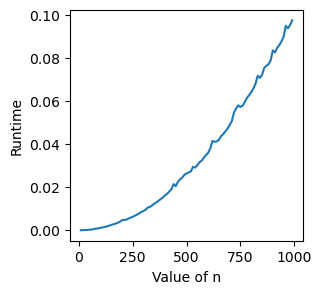

In [29]:
plotruntime(lambda n :inCommon1(recordsA[:n],recordsB[:n]),range(10,1000,10),3)

Unsurprisingly this looks like a parabola. 

How much time would this take to check the full 100,000? Let's try to estimate this. The runtime appears to look like a parabola of the form $T(N)=\alpha N^2$. As $T(500)=0.02$, this means $0.02=\alpha 500^2$ and thus $\alpha=\frac{0.02}{500^2}=.00000008$. Knowing this, the time for 10,000 would be $T(10000)=.00000008\cdot100000^2=800$.

Each of `recordsA` and `recordsB` has 10 megabytes of data. This is not exactly big data! And 800 seconds, 12 minutes, is a long time to see if there is a duplicate record. If we had a gigabyte of data, that is 10 million records of size 100, our code would run a 10,000 times slower and take three months to finish!

## Attempt 2

Perhaps you know that you can write `x in A` which returns true or false depending on whether `x` is in the list `a`. So let's remove the second for loop and replace it with an `if` using `in`.

In [30]:
def inCommon2(A,B):
    for a in A:
        if a in B:
            return True
    return False

So we have eliminated one of the loops. Does this speed it up?

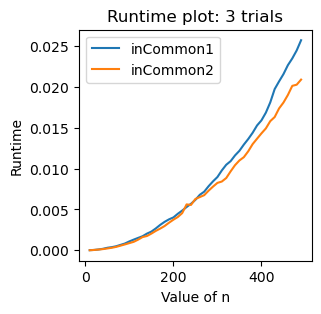

In [31]:
plotruntimes([lambda n :inCommon1(recordsA[:n],recordsB[:n]),
              lambda n :inCommon2(recordsA[:n],recordsB[:n]),
             ],["inCommon1","inCommon2"],range(10,500,10),3)

The runtimes are almost the same. There is no magic here, as the only way python can determine if `a in B` is true is to loop through the elements of `B`. Thus is `in` statement is really just a shortcut for writing out the whole loop.

## Attempt 3

For the third attempt, we make the following simple observation: If you are looking for duplicates in a sorted list, they are next to each other. This gives rise to the following algorithm: first sort, then scan once to check for duplicates. This is easily coded as lists in python have a built-in sort method.

In [32]:
def inCommon3(A,B):
    C=A+B
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False

What sort of runtime do we expect? Indexing a list is a fast constant-time operation, and sorting takes time proportional to $n \log n$, which is much closer to $n$ than $n^2$. So we hope that Attempt 3 is much faster.

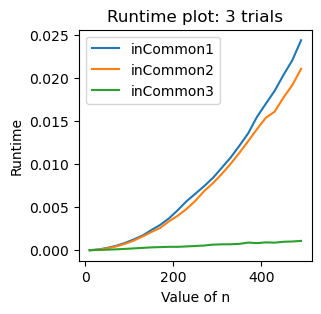

In [33]:
plotruntimes([lambda n :inCommon1(recordsA[:n],recordsB[:n]),
              lambda n :inCommon2(recordsA[:n],recordsB[:n]),
              lambda n :inCommon3(recordsA[:n],recordsB[:n]),
             ],["inCommon1","inCommon2","inCommon3"],range(10,500,20),3)

And, in fact it is fast. Fast enough that we can try it on the whole data set, just just on the first 500 values.

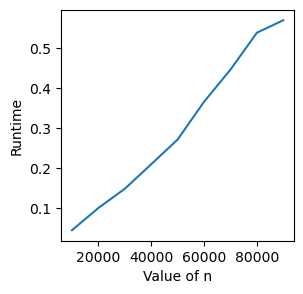

In [34]:
plotruntime(lambda n :inCommon3(recordsA[:n],recordsB[:n]),range(10000,100000,10000),1)

This looks pretty good, something close to linear, which is what we expected.

## A detour: hash functions

One of the fundamental ways of dealing with big data is to make it smaller, and one of the classic ways to do this is via a hash function.

A ideal hash function takes some data and turns it into a number within a certain range $[1..r]$. The simple idea is that if `hash` is a hash function then if $hash(x)\not = hash(y)$ then $x \not = y$, and if $hash(x)=hash(y)$ then usually $x=y$. I say usually, as there is a small chance ($\frac{1}{r}$) that 
$hash(x) = hash(y)$ but $x \not = y$. This is called a *hash collision* when this happens.

Python has built in hashing, which works on anything that you can not change. So, it works on strings and tuples, but not lists. However, you can easily convert a list to a tuple. 

There are no ideal practical hash functions. Python's built-in hashing is fast, but you should assume collisions could happen. To be more sure that a collision is avoided one should use a *cryptographic hash function*. Understanding how these work is a entirely [different subject](https://www.ulb.be/fr/programme/info-f405), but know that there is a [python library](https://pycryptodome.readthedocs.io/en/latest/src/hash/hash.html) where you can find these hash functions. The current best is [SHA3](https://en.wikipedia.org/wiki/SHA-3) which was invented by thee people including Gilles Van Assche, who teaches the Crypto course at ULB.

In [35]:
print(hash("hello"))

print(hash( (3,4) ))

A="hello"
print(hash(A))

#Does not work!
#print(hash([1,2,3]))

print(hash(tuple([1,2,3])))


-4223586279731815327
1079245023883434373
-4223586279731815327
529344067295497451


## Attempt 4

Ok, so how can these hash functions help us? What was the expensive step in attempt 3? The sort: `C.sort()`. What was `C` again? It was a list where each item was a list of length 100. What if trying to sort lists of length 100, we simply replace the lists of length 100 with the hash of the list of length 100? We would get the following code:

In [36]:
def inCommon4a(A,B):
    C=[hash(tuple(c)) for c in A+B] 
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False

This has one problem though, what if there is a hash collision? That is suppose there is something in `A` and something in `B` which are different but that hash to the same value. In this case True will be returned in error. If we are OK with this kind of error then we can stop, but if we are not ok, we need to be a bit more sophisticated. We can not just ignore the data and look at the hashes, but we can certainly save time by looking only at the data when the hashes are equal.

I have not talked about really what sorting does to lists and tuples. Here is an example.

In [37]:
A=[(hash(x),x) for x in ["dog","cat","panda","sloth"]]
print(sorted(A))

[(-6936087838811577683, 'sloth'), (-4830305757691340311, 'cat'), (-3506695538708153318, 'dog'), (-547684503618123573, 'panda')]


To sort a tuple or list, python uses what is known as *Lexicographic order*, which is the same order one used in a dictionary. Meaning, it sorts based on the first element, and if there are any ties it resolves them using the order of the second element, etc. So, by putting the hash as the first element of a tuple, python's sorting method will only look at the second element if there are identical first elements. Which is exactly what we want:

In [38]:
def inCommon4(A,B):
    C=[(hash(tuple(c)),c) for c in A+B]
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False


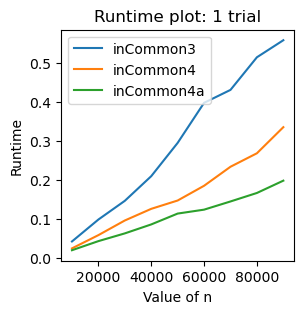

In [39]:
plotruntimes([lambda n :inCommon3(recordsA[:n],recordsB[:n]),
              lambda n :inCommon4(recordsA[:n],recordsB[:n]),
              lambda n :inCommon4a(recordsA[:n],recordsB[:n]),
             ],["inCommon3","inCommon4","inCommon4a"],range(10000,100000,10000),1)

These runtimes are what you would expect. Incommon 4 and 4a are faster, with 4 being slightly worse due to the added complexity of the tuple. Remember that our records were of size 100. You would expect that if these were changed to be of size 10000, Incommon3 would become 100 times slower and while 4/4a would stay the same. I didn't do this experiment, but perhaps you could!

## Attempt 5: Using python sets

The python set class holds a collection of objects which are immutable, that is to say, where hash(x) works. It uses a data structure called a *hash table* to store all the objects, and inserting, deleting, and checking to see if an object is in the table should be very fast; in addition, the time should not slow down as more elements are added, so long as everything fits in memory. 

In [40]:
def inCommon5(A,B):
    S=set( tuple(c) for c in A)
    for b in B:
        if tuple(b) in S:
            return True
    return False
    

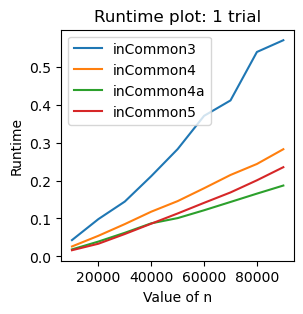

In [42]:
plotruntimes([lambda n :inCommon3(recordsA[:n],recordsB[:n]),
              lambda n :inCommon4(recordsA[:n],recordsB[:n]),
              lambda n :inCommon4a(recordsA[:n],recordsB[:n]),
              lambda n :inCommon5(recordsA[:n],recordsB[:n]),
             ],["inCommon3","inCommon4","inCommon4a","inCommon5"],range(10000,100000,10000),1)

InCommon5 should be the fastest as you try larger values of $n$, but I have kept this to 100,000 so that the sheet runs quickly. I encourage you to experiment.

# Conclusion

Hashing is the answer. By transmitting the hash values rather than the files themselves, one can very easily check whether a file needs to be transmitted or not.

https://www.dropbox.com/developers/reference/content-hash

For example, I have 253GB in my Dropbox account, in 240,139 files. Dropbox probably uses the hash function SHA256 which hashes each file to 256 bits, which is 32 bytes. So the hashes of all my files could be transmitted in a 8MB file, which is 0.003% of the size of the total data set.





# Asymptotic notation (Big-O)


Usually we want to express the runtime of an algorithm as a function of the input size, which is usually represented as the variable $N$. That is to say, we are interested in knowing how the runtime behaves as the amount of data grows.

In the above discussion I have used the words such as *linear* to describe the runtime of an algorithm. A linear algorithm would run roughly twice as long on an input twice as big. In the study of algorithms, we do not typically give an exact formula for the runtime, as this would depend on the exact details of the computer we wish to run it on. 

Mathematicians have developed notation to express the idea of a *linear function*. They write it as $\Theta(N)$. Informally, a function $F(N)=\Theta(N)$ if $F(N)=cN+$some lower order terms. 


Formally, $f(n)=\Theta(g(n))$ if
$$ \exists_{c_1>0}\exists_{c_2>0}\exists_{n_0>1}\forall_{n>n_0} c_1g(n)\leq f(n) \leq c_2 g(n)  $$

While this looks complicated, $f(N)=\Theta(N)$ simply means that there is some point $n_0$ such that $f(n)$ is trapped between two lines, $c_1n$ and $c_2n$ for all $n>n_0$. That is, if $f(N)$ can stay between two lines for forever after a certain point, it is linear. 

This definition works for any function, for example $f(n)=\Theta(n^2)$ means $f(n)$ is can be trapped between two parabolas beyond a certain point.

You will often see $O$ used instead of $\Theta$. 

Formally, $f(n)=O(g(n))$ if
$$ \exists_{c>0}\exists_{n_0>1}\forall_{n>n_0}  f(n) \leq c g(n)  $$

Thus $f(n)=O(n)$ requires that $f(n)$ be under some line $cn$ beyond some point, but not that it is above another line like in big-$\Theta$. So, for example, it is technically true that $\sqrt{n}=O(n)$. But, normally, if we know that the running time of an algorithms is proportional to $\sqrt{n}$, it would be strange to say the running time is $O(n)$ instead of $O(\sqrt{n})$

For more details on this topic, see the chapter *Growth of functions* in Introduction to Algorithms by Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein, which is the standard textbook for algorithms.





# Exercise

This not graded. I will go over it in class if there is some interest. 


Look at this `BigData` function and what it does.

In [4]:
def BigData(n):
    S='BigData'
    T=""
    for i in range(n):
        T=T+S[i%7]
    return T

for i in range(20):
    print(BigData(i))
    


B
Bi
Big
BigD
BigDa
BigDat
BigData
BigDataB
BigDataBi
BigDataBig
BigDataBigD
BigDataBigDa
BigDataBigDat
BigDataBigData
BigDataBigDataB
BigDataBigDataBi
BigDataBigDataBig
BigDataBigDataBigD
BigDataBigDataBigDa


Your tasks are:
- Graph its runtime as a function of `n`
- Discuss how the runtime is growing
- Try to explain why it is growing how it is
- Code something much faster and repeat the first three steps above

## Plot and explation of the runtime complexity

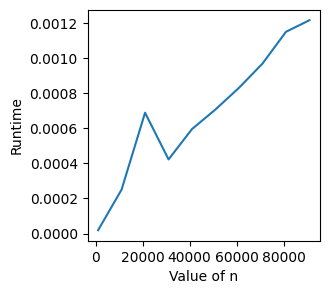

In [38]:
plotruntime(BigData,range(1000,100000,10000),10)

The runtime grows linearly in the parameter n, the reason is because the for statement repeats n times the action that consists in a adding a new letter to string S.

Note : Adding a letter at the end of a string is done in constant time.

# Faster version

In [54]:
def BigData2(n):
    S='BigData'
    T=""
    if n < 7:
        # Add simply the n first letters
        T += S[:n]
        return T
    else:
        nb_repeat = n // 7
        nb_letter_prefix = n % 7
        # if n is a multiple of 7 no prefixe to add.
        if n % 7 == 0:
            T += S * nb_repeat
            return T
        else:
            T += S * nb_repeat
            T += S[:nb_letter_prefix]
    return T

for i in range(20):
    print(BigData2(i))    


B
Bi
Big
BigD
BigDa
BigDat
BigData
BigDataB
BigDataBi
BigDataBig
BigDataBigD
BigDataBigDa
BigDataBigDat
BigDataBigData
BigDataBigDataB
BigDataBigDataBi
BigDataBigDataBig
BigDataBigDataBigD
BigDataBigDataBigDa


## Plot and explation of the runtime complexity

As we can see, the time complexity is less than linear, the linear for statement that loops n time (linear job) has been remove.

And instead, on the way 7 divides the number n (7 is the length of string 'BigData') : We check how many time the wordsrepeats and we add it to string S and in case of a number which is not a multiple of 7 we have to add a prefixe which is of lenght n%7.

Note : The both actions that add a string to the end of a string are done in constant time.

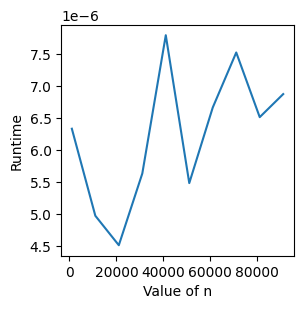

In [52]:
plotruntime(BigData2,range(1000,100000,10000),1)